In [1]:
## check availability of GPU (nvidia-smi)
import os
os.environ["CUDA_VISIBLE_DEVICES"]="4"

In [2]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla V100-SXM2-32GB, compute capability 7.0


In [3]:
import warnings
warnings.filterwarnings("ignore")

import os 
import glob

current_dir = "/mnt/akoustos/"

data_dir = current_dir + "Data/"
labeled_data_dir = data_dir + 'Labeled_Data/'
audio_dir = data_dir + "Raw_Audio/"

spectrogram_dir = data_dir + "Extracted_Spectrogram/"
if not os.path.exists(spectrogram_dir):
    os.makedirs(spectrogram_dir)


In [4]:
from src.data_split import Data_Split
categories = []   ## classify all categories
data = Data_Split.data_split(categories, spectrogram_dir, include_no_label_category = False)
print(data.head(10))

  label  Count  Percentage
0    14    500       21.83
1    25    500       21.83
2  2662    407       17.77
3  4949    501       21.88
4  5620    382       16.68
Size of train, val, test dataset: 1602 344 344
Percentage of train, val, test dataset: 70.0% 15.0% 15.0%
                                            filename label  split
0  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  2662  train
1  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  4949  train
2  /mnt/akoustos/Data/Extracted_Spectrogram/proje...    25  train
3  /mnt/akoustos/Data/Extracted_Spectrogram/proje...    25  train
4  /mnt/akoustos/Data/Extracted_Spectrogram/proje...    25  train
5  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  4949    val
6  /mnt/akoustos/Data/Extracted_Spectrogram/proje...    25   test
7  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  2662    val
8  /mnt/akoustos/Data/Extracted_Spectrogram/proje...    25  train
9  /mnt/akoustos/Data/Extracted_Spectrogram/proje...    25  train


### Train with a Customized CNN 

Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 139.09244 | Val Loss: 24.09122 | Train Acc: 0.237| Val Acc: 0.352
Epoch 02: | Train Loss: 27.74622 | Val Loss: 4.43092 | Train Acc: 0.443| Val Acc: 0.794
Epoch 03: | Train Loss: 16.52194 | Val Loss: 7.90080 | Train Acc: 0.551| Val Acc: 0.570
Epoch 04: | Train Loss: 9.58175 | Val Loss: 2.60659 | Train Acc: 0.572| Val Acc: 0.683
Epoch 05: | Train Loss: 4.04434 | Val Loss: 1.02729 | Train Acc: 0.669| Val Acc: 0.834
Epoch 06: | Train Loss: 1.51077 | Val Loss: 0.58343 | Train Acc: 0.727| Val Acc: 0.855
Epoch 07: | Train Loss: 0.93428 | Val Loss: 0.57548 | Train Acc: 0.763| Val Acc: 0.849
Epoch 08: | Train Loss: 0.73194 | Val Loss: 0.52571 | Train Acc: 0.776| Val Acc: 0.855
Epoch 09: | Train Loss: 0.90767 | Val Loss: 0.66505 | Train Acc: 0.767| V

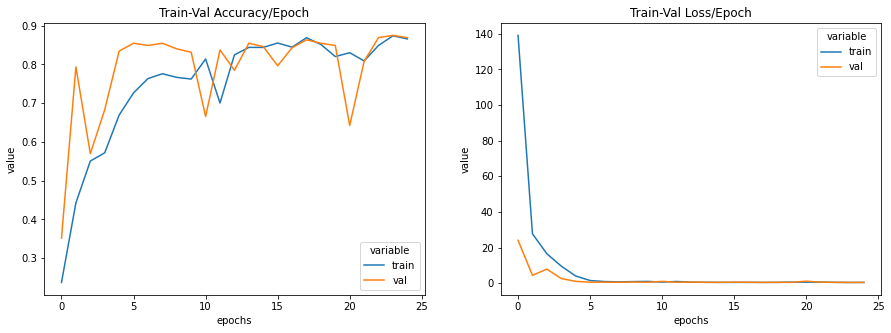

Scoring results on testset:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        80
           1       0.90      0.93      0.92        91
           2       0.93      0.90      0.91        58
           3       0.69      0.90      0.78        61
           4       0.87      0.63      0.73        54

    accuracy                           0.86       344
   macro avg       0.87      0.85      0.85       344
weighted avg       0.87      0.86      0.86       344

Confusion matrix on testset:
            pred: 14  pred: 25  pred: 2662  pred: 4949  pred: 5620
true: 14          70         2           3           5           0
true: 25           0        85           0           4           2
true: 2662         2         1          52           2           1
true: 4949         2         1           1          55           2
true: 5620         1         5           0          14          34


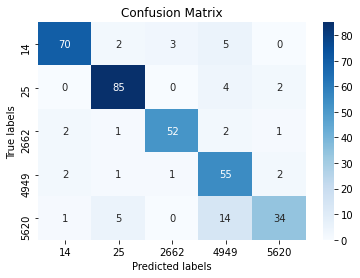

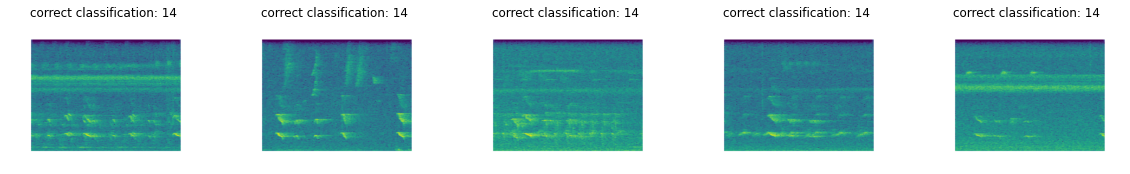

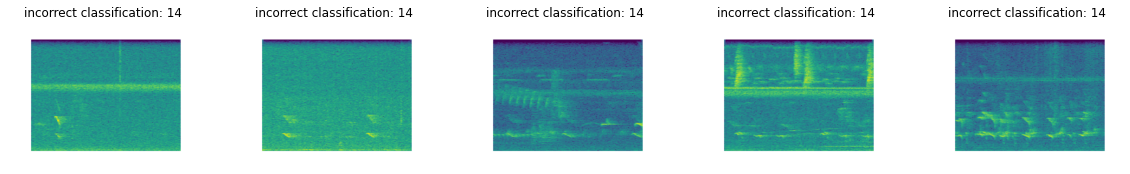

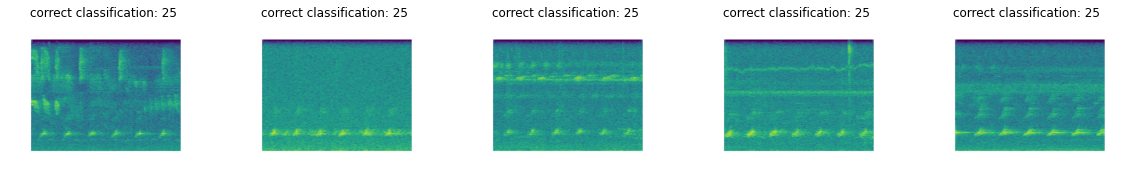

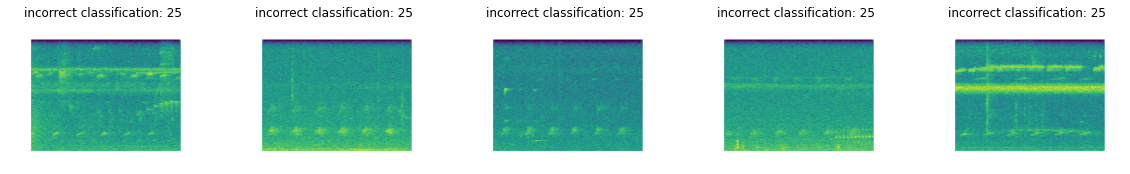

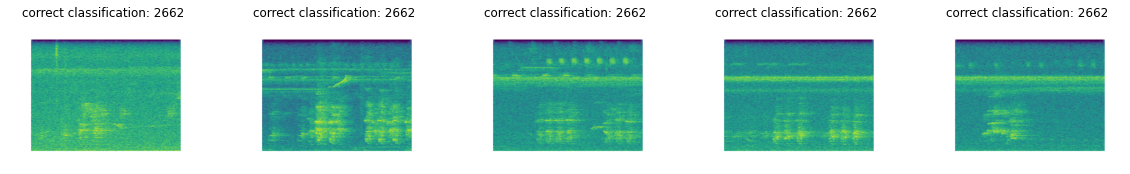

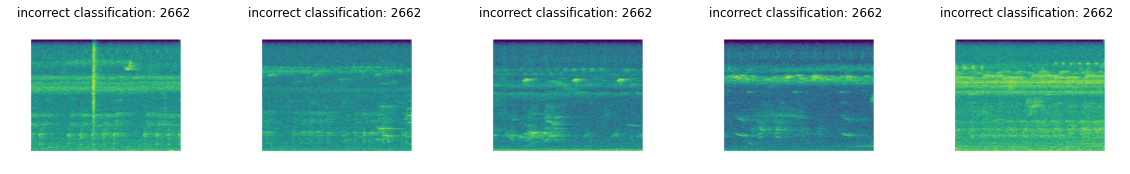

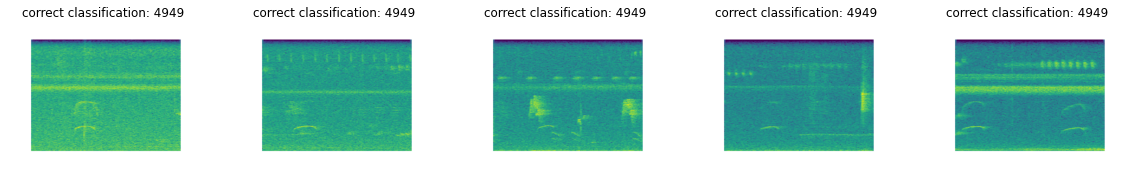

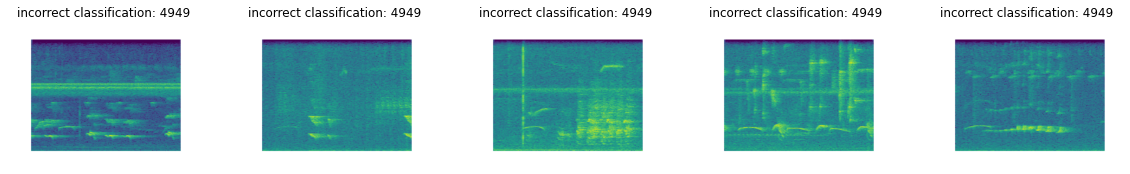

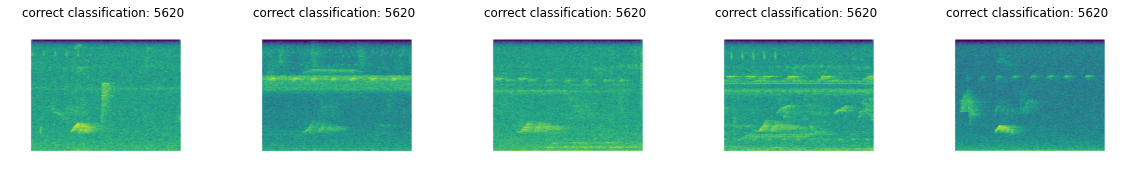

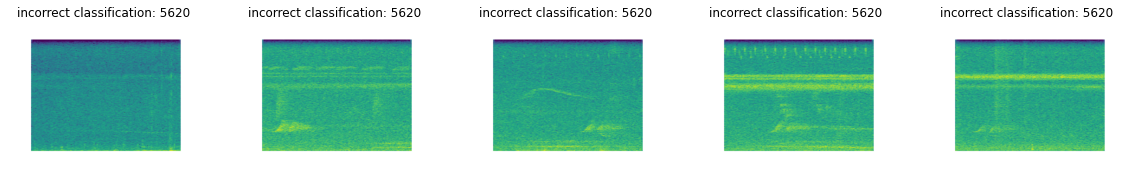

In [5]:
from src.model.multiclass_classification import multiclass_classification_models
model = multiclass_classification_models.train_model(data = data, 
                                                     model_name = 'Customized_CNN', 
                                                     batch_size = 32,  
                                                     optimizer = 'Adam', 
                                                     learning_rate = 0.008, 
                                                     lr_decay = False, 
                                                     num_epochs = 25)


### Fine-tune a pre-trained model

Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 0.56705 | Val Loss: 0.31314 | Train Acc: 0.818| Val Acc: 0.913
Epoch 02: | Train Loss: 0.37432 | Val Loss: 0.31888 | Train Acc: 0.896| Val Acc: 0.913
Epoch 03: | Train Loss: 0.37753 | Val Loss: 0.31123 | Train Acc: 0.898| Val Acc: 0.913
Epoch 04: | Train Loss: 0.38259 | Val Loss: 0.31012 | Train Acc: 0.903| Val Acc: 0.910
Epoch 05: | Train Loss: 0.36347 | Val Loss: 0.31101 | Train Acc: 0.906| Val Acc: 0.910
Epoch 06: | Train Loss: 0.37281 | Val Loss: 0.32040 | Train Acc: 0.895| Val Acc: 0.907
Epoch 07: | Train Loss: 0.37523 | Val Loss: 0.32076 | Train Acc: 0.896| Val Acc: 0.907
Epoch 08: | Train Loss: 0.37981 | Val Loss: 0.31390 | Train Acc: 0.896| Val Acc: 0.916
Epoch 09: | Train Loss: 0.37238 | Val Loss: 0.31058 | Train Acc: 0.899| Val Ac

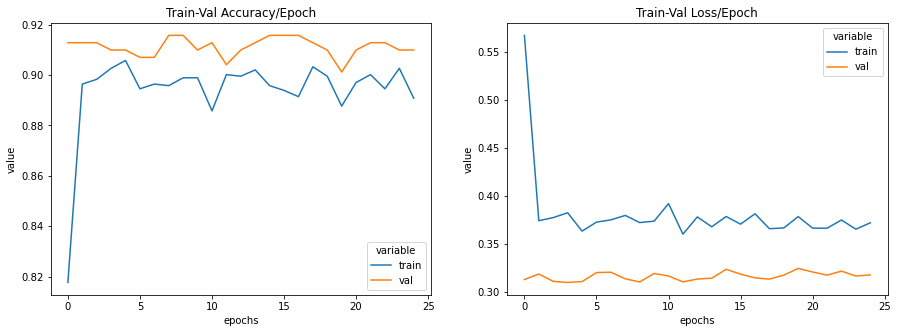

Scoring results on testset:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        80
           1       0.97      0.99      0.98        91
           2       0.90      0.93      0.92        58
           3       0.95      0.95      0.95        61
           4       0.83      0.80      0.81        54

    accuracy                           0.92       344
   macro avg       0.91      0.91      0.91       344
weighted avg       0.92      0.92      0.92       344

Confusion matrix on testset:
            pred: 14  pred: 25  pred: 2662  pred: 4949  pred: 5620
true: 14          71         2           0           0           7
true: 25           0        90           0           0           1
true: 2662         4         0          54           0           0
true: 4949         2         0           0          58           1
true: 5620         1         1           6           3          43


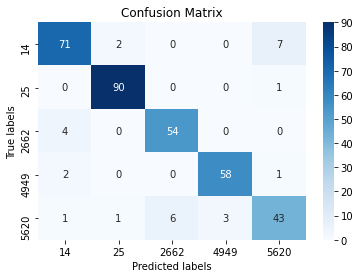

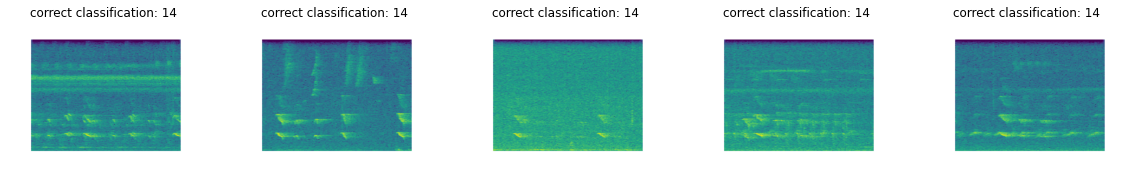

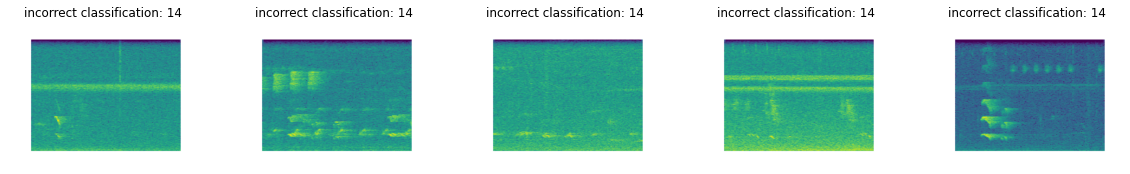

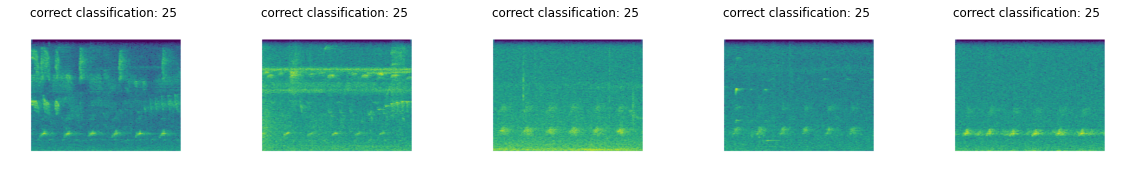

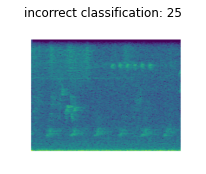

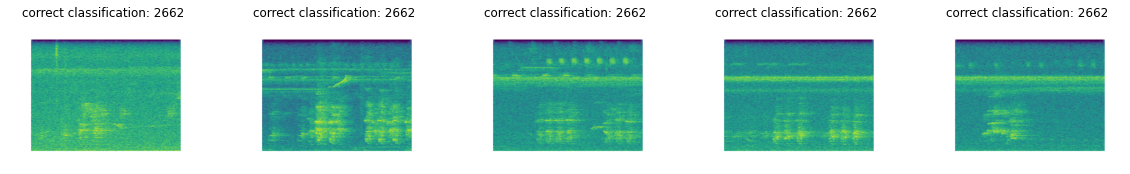

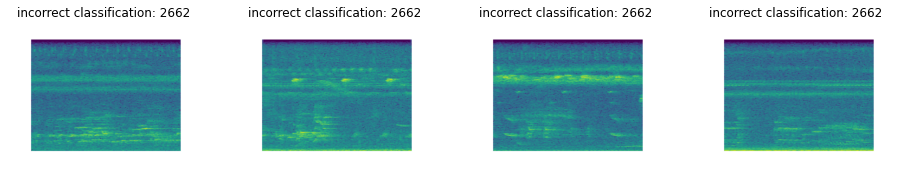

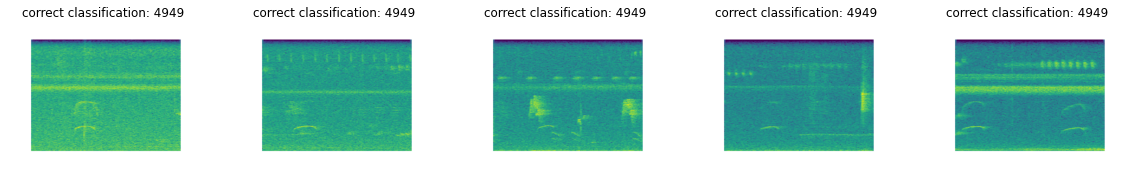

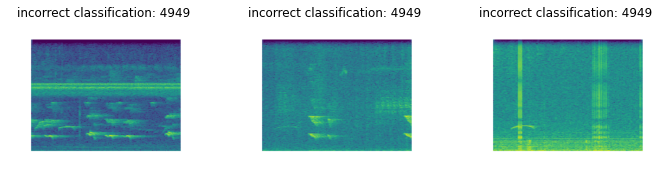

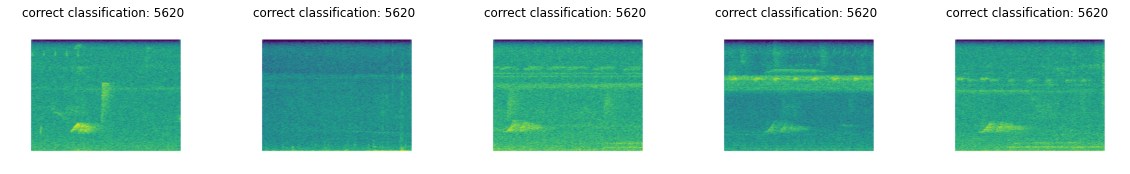

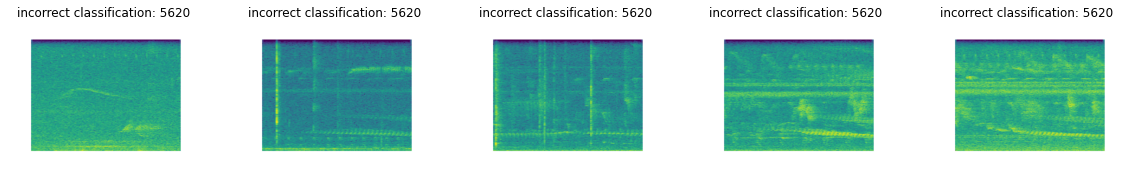

In [6]:
from src.model.multiclass_classification import multiclass_classification_models
model = multiclass_classification_models.train_model(data = data, 
                                                 model_name = 'Densenet121', 
                                                 batch_size = 32, 
                                                 pretrained = True, 
                                                 optimizer = 'Adam', 
                                                 learning_rate = 0.0005, 
                                                 lr_decay = True, 
                                                 num_epochs = 25)


Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 0.66461 | Val Loss: 0.33384 | Train Acc: 0.770| Val Acc: 0.901
Epoch 02: | Train Loss: 0.47544 | Val Loss: 0.32789 | Train Acc: 0.846| Val Acc: 0.907
Epoch 03: | Train Loss: 0.48140 | Val Loss: 0.32643 | Train Acc: 0.832| Val Acc: 0.910
Epoch 04: | Train Loss: 0.49687 | Val Loss: 0.32531 | Train Acc: 0.831| Val Acc: 0.907
Epoch 05: | Train Loss: 0.48249 | Val Loss: 0.32542 | Train Acc: 0.840| Val Acc: 0.913
Epoch 06: | Train Loss: 0.47177 | Val Loss: 0.30618 | Train Acc: 0.835| Val Acc: 0.910
Epoch 07: | Train Loss: 0.47937 | Val Loss: 0.32819 | Train Acc: 0.838| Val Acc: 0.910
Epoch 08: | Train Loss: 0.48214 | Val Loss: 0.30485 | Train Acc: 0.838| Val Acc: 0.907
Epoch 09: | Train Loss: 0.45552 | Val Loss: 0.34607 | Train Acc: 0.849| Val Ac

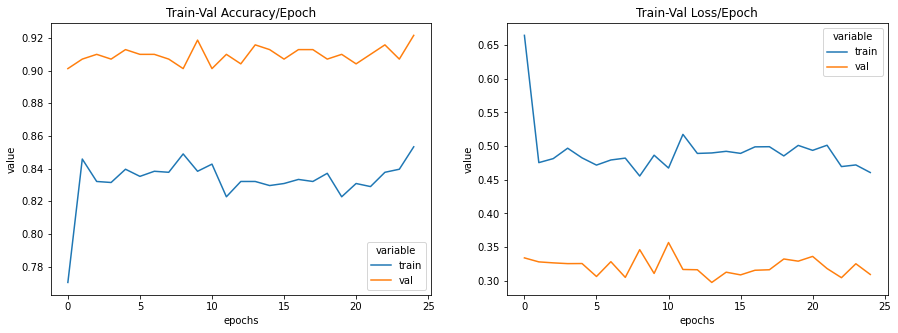

Scoring results on testset:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        80
           1       0.97      0.97      0.97        91
           2       0.82      0.97      0.89        58
           3       0.95      0.87      0.91        61
           4       0.87      0.76      0.81        54

    accuracy                           0.91       344
   macro avg       0.90      0.90      0.90       344
weighted avg       0.91      0.91      0.91       344

Confusion matrix on testset:
            pred: 14  pred: 25  pred: 2662  pred: 4949  pred: 5620
true: 14          74         2           2           0           2
true: 25           1        88           0           0           2
true: 2662         1         0          56           1           0
true: 4949         5         0           1          53           2
true: 5620         1         1           9           2          41


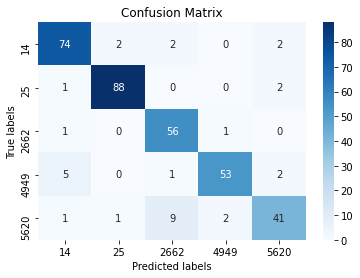

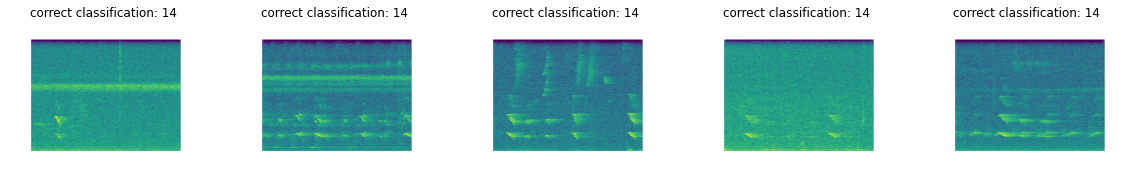

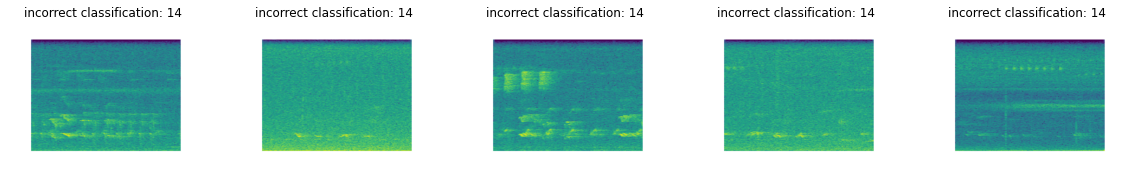

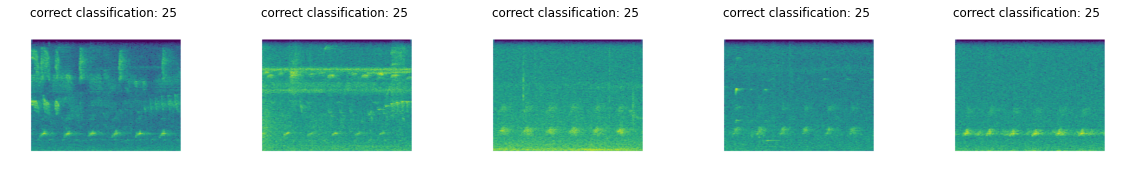

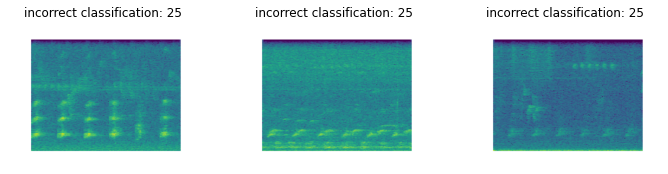

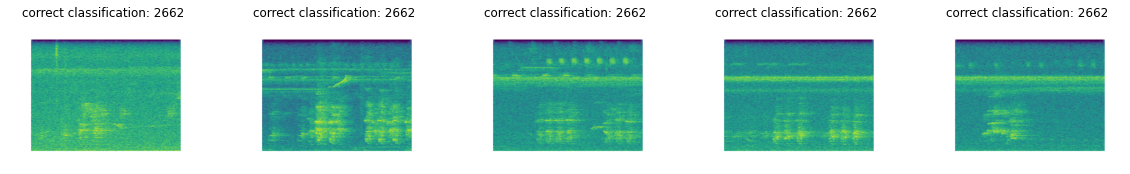

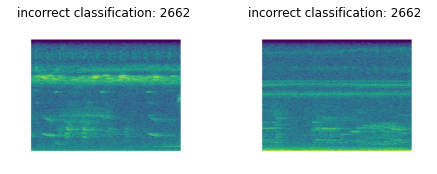

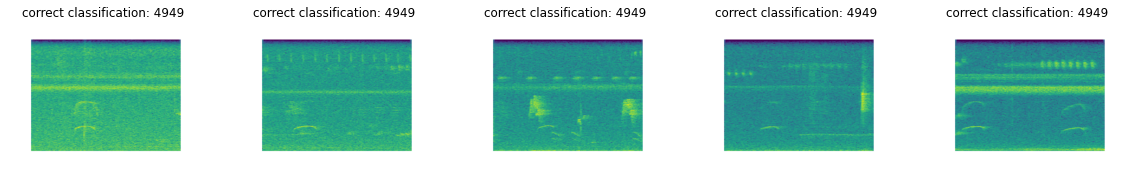

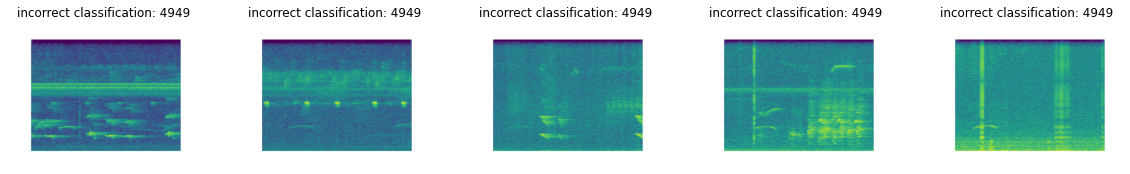

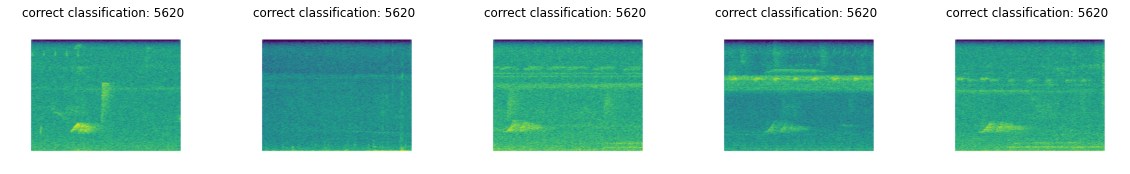

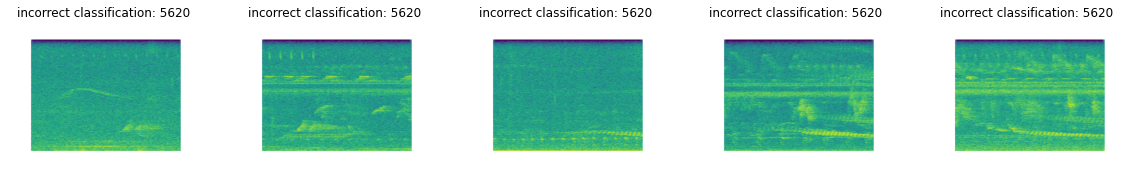

In [7]:
from src.model.multiclass_classification import multiclass_classification_models
model = multiclass_classification_models.train_model(data = data, 
                                                 model_name = 'Densenet121', 
                                                 batch_size = 32, 
                                                 pretrained = True, 
                                                 optimizer = 'Adam', 
                                                 learning_rate = 0.002, 
                                                 lr_decay = True, 
                                                 num_epochs = 25)
